In [30]:
from scipy.integrate import solve_ivp

#### Problem 1
Imagine that we have drilled a (red) tunnel from the North Pole and to the South Pole, see the figure below. We can drop a stone from the North Pole just
above the tunnel so the stone drops into the tunnel. We assume for now, that the is no air resistance in the tunnel. The equations of motion for the stone is

>$\dot x=v$

>$\dot v=-\frac{x}{R}g$

where we have taken into account that the acceleration inside the Earch changes linearly with the distance from the centre of the Earth.
The radius of the Earth is $R=6370 \text{ km}$.


>a) Determine how time it takes for the stone to reach the centre of the Earth when dropped from the North Pole.

>b) Determine how time it takes for the stone to return to the North Pole when dropped from the North Pole.

>c) We now add quadratic air resistance to the tunnel. Use the expression $-alpha*np.abs(v)*v$ with $alpha=1.0e-7$. Simulate for 50000 s and plot a phase plot of the motion. Comment briefly.

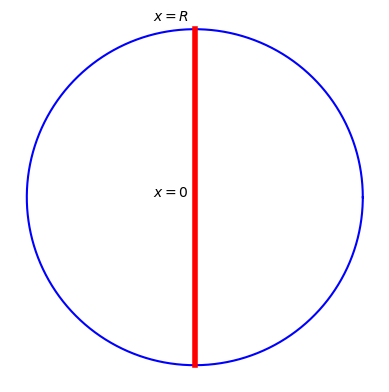

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
t = np.linspace(0,2*np.pi,1000)
plt.plot(np.cos(t),np.sin(t),'b-')
plt.plot([0,0],[-1,1],'r-',linewidth=4)
plt.text(-0.25,0.0,'$x=0$')
plt.text(-0.25,1.05,'$x=R$')
plt.axis('scaled')
plt.axis('off')
plt.show()

In [32]:
# a)
R = 6370e3  # Convert km to meters
g = 9.8  # m/s²
def f(t,y):
    x,v = y
    return [v, -x/R*g]

def center(t, z):
    x,v = z
    return x  # Stop when x = 0

center.direction = -1
center.terminal = True

# Solve the system
t_span = [0, 5000]  # Simulate for a reasonable time
y0 = [R, 0]  # Start from the surface with zero velocity

sol = solve_ivp(f, t_span, y0, events=center, dense_output=True)
display(sol)
# Display result
print(f"Time to reach the center: {sol.t_events[0][0]:.2f} seconds")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.020e-04  1.122e-03  1.133e-02  1.134e-01
             1.134e+00  1.134e+01  1.134e+02  6.612e+02  1.266e+03]
        y: [[ 6.370e+06  6.370e+06 ...  4.345e+06 -9.313e-10]
            [ 0.000e+00 -1.000e-03 ... -5.777e+03 -7.902e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA0B727B10>
 t_events: [array([ 1.266e+03])]
 y_events: [array([[-9.313e-10, -7.902e+03]])]
     nfev: 56
     njev: 0
      nlu: 0

Time to reach the center: 1266.31 seconds


In [33]:
# b)
def return_to_surface(t, z):
    v,a = z
    return a-g  # Stop when the acceleration is zero as we reach the surface

return_to_surface.direction = -1
return_to_surface.terminal = True

# Solve the system
t_span = [0, 10000]  # Simulate for a reasonable time
y0 = [R, 0]  # Start from the surface with zero velocity

sol = solve_ivp(f, t_span, y0, events=return_to_surface, dense_output=True)
display(sol)

# Display result
if sol.t_events[0].size > 0:
    print(f"Time to return to surface: {sol.t_events[0][0]:.2f} seconds")
else:
    print("Event function did not trigger correctly!")

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.020e-04 ...  4.557e+03  5.063e+03]
        y: [[ 6.370e+06  6.370e+06 ...  5.151e+06  6.371e+06]
            [ 0.000e+00 -1.000e-03 ...  4.648e+03  9.800e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA638CAD10>
 t_events: [array([ 5.063e+03])]
 y_events: [array([[ 6.371e+06,  9.800e+00]])]
     nfev: 86
     njev: 0
      nlu: 0

Time to return to surface: 5063.45 seconds


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.020e-04 ...  4.990e+04  5.000e+04]
        y: [[ 6.370e+06  6.370e+06 ...  1.348e+05  1.735e+05]
            [ 0.000e+00 -1.000e-03 ...  4.095e+02  3.849e+02]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA63840810>
 t_events: None
 y_events: None
     nfev: 2114
     njev: 0
      nlu: 0

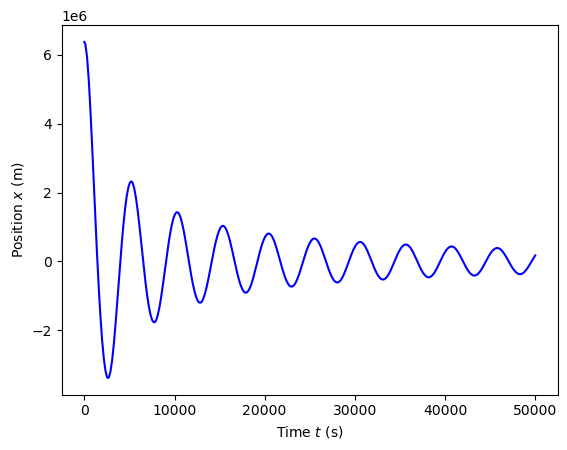

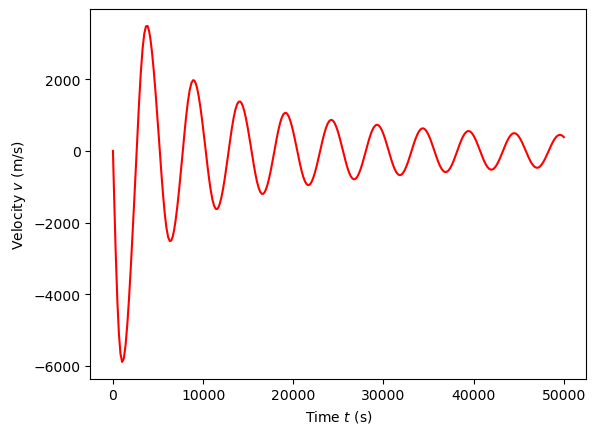

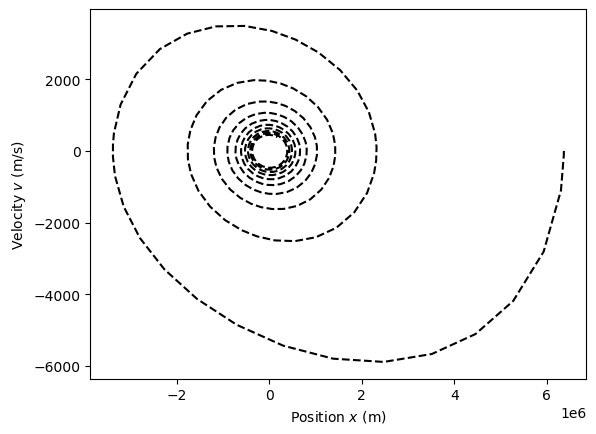

In [34]:
# c)
alpha = 1e-7

# Add air resistance
def f(t,y):
    x,v = y
    return [v, -x/R*g - alpha*np.abs(v)*v]

# Solve the system
t_span = [0, 50000]  # Simulate for a reasonable time
y0 = [R, 0]  # Start from the surface with zero velocity
sol = solve_ivp(f, t_span, y0, dense_output=True, rtol=1e-6, atol=1e-9)

# Display result
display(sol)
t = sol.t
x = sol.y[0]
v = sol.y[1]
plt.figure()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Position $x$ (m)')
plt.plot(t,x,'b-')
plt.show()
plt.xlabel('Time $t$ (s)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(t,v,'r-')
plt.show()
plt.xlabel('Position $x$ (m)')
plt.ylabel('Velocity $v$ (m/s)')
plt.plot(x,v,'k--')
plt.show()

#### Problem 2

Motion with air resistance. We will now simulate the motion of a tennis ball and a shuttle cock in the presence of air resistance.
The model can be expressed by

> $\dot x =v_x$

> $\dot y =v_y$

> $\dot v_x =-\frac{1}{2}\rho A c vv_x/m$

> $\dot v_y =-g-\frac{1}{2}\rho A c vv_y/m$

where $v=\sqrt{v_x^2+v_y^2}$.

The parameters are the mass, $m$, the density of air, $\rho$, the cross-section area, $A$, and a form factor, $c$, that depends on the geometry.
For at circular cross-section $A=\pi r^2$ where $r$ is the radius.

>a) Simulate and plot the motion in the $xy$-plane of a tennis ball. $m=58.0$ g, $r=3.3$ cm, $c=0.50$. In the same plot show the trajectory without air resistance.

>b) Simulate and plot the motion in the $xy$-plane of a shuttle cock. $m=5.00$ g, $r=3.0$ cm, $c=0.55$. In the same plot show the trajectory without air resistance.

>c) Simulate (with trial-and-error) to obtain the trajectory of a shuttle cock that starts in a height of 1.0 m from a distance of 2.0 m from the net. The net has the heigth 1.55 m. The trajctory should just clear the net and end 5.0 m from the starting position (horizontal distance only). The plot commands below may help visualization.

```python
plt.plot([0,5],[0,0],'k-')
plt.plot([0,0],[0,1],'k-')
plt.plot([2,2],[0,1.55],'k-')
```


In [35]:
g = 9.82
rho = 1.2
m = 58.0e-3 # kg
r = 3.3e-2 # m
c = 0.5
A = np.pi * r**2
def f_air(t,z):
    x,y,vx,vy = z
    v = np.sqrt(vx**2+vy**2)
    return [vx,vy,-0.5*rho*A*c*vx*v/m,-g-0.5*rho*A*c*vx*v/m]

def f(t,z):
    x,y,vx,vy = z
    v = np.sqrt(vx**2+vy**2)
    return [vx,vy,0, -g]

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05 ...  2.031e+00  2.037e+00]
        y: [[ 0.000e+00  9.999e-04 ...  2.031e+01  2.037e+01]
            [ 0.000e+00  9.999e-04 ...  5.546e-02 -5.551e-15]
            [ 1.000e+01  1.000e+01 ...  1.000e+01  1.000e+01]
            [ 1.000e+01  9.999e+00 ... -9.945e+00 -1.000e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA6372F490>
 t_events: [array([ 2.037e+00])]
 y_events: [array([[ 2.037e+01, -5.551e-15,  1.000e+01, -1.000e+01]])]
     nfev: 1238
     njev: 0
      nlu: 0

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05 ...  1.731e+00  1.739e+00]
        y: [[ 0.000e+00  9.999e-04 ...  1.480e+01  1.486e+01]
            [ 0.000e+00  9.998e-04 ...  8.161e-02  2.220e-16]
            [ 1.000e+01  1.000e+01 ...  7.329e+00  7.316e+00]
            [ 1.000e+01  9.999e+00 ... -9.670e+00 -9.766e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA63184710>
 t_events: [array([ 1.739e+00])]
 y_events: [array([[ 1.486e+01,  2.220e-16,  7.316e+00, -9.766e+00]])]
     nfev: 1058
     njev: 0
      nlu: 0

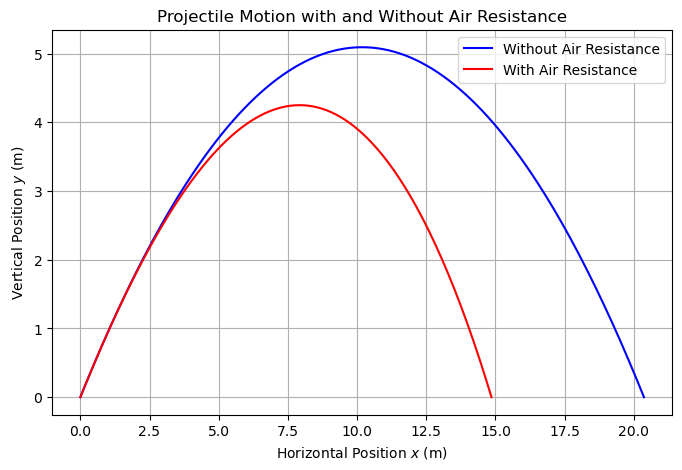

In [36]:
# a)
def floor_hit(t,z):
    x, y, vx, vy = z
    return y  # Stop when y = 0
floor_hit.direction = -1
floor_hit.terminal = True

# Solve the system with air resistance
t_span = [0, 10]
x = 0
y = 0
vx = 10
vy = 10
z0 = [x, y, vx, vy]
sol_air = solve_ivp(f_air, t_span, z0, events=floor_hit, dense_output=True, max_step=0.01)
sol = solve_ivp(f, t_span, z0, events=floor_hit, dense_output=True, max_step=0.01)

# Display result and make a plot
display(sol)
display(sol_air)
t_air = sol_air.t
x_air = sol_air.y[0]
y_air = sol_air.y[1]

t = sol.t
x = sol.y[0]
y = sol.y[1]
# Create the plot
plt.figure(figsize=(8, 5))
plt.title('Projectile Motion with and Without Air Resistance')

# Plot the trajectory
plt.plot(x, y, 'b-', label='Without Air Resistance')
plt.plot(x_air, y_air, 'r-', label='With Air Resistance')

# Labels and legend
plt.xlabel('Horizontal Position $x$ (m)')
plt.ylabel('Vertical Position $y$ (m)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05 ...  2.031e+00  2.037e+00]
        y: [[ 0.000e+00  9.999e-04 ...  2.031e+01  2.037e+01]
            [ 0.000e+00  9.999e-04 ...  5.546e-02 -5.551e-15]
            [ 1.000e+01  1.000e+01 ...  1.000e+01  1.000e+01]
            [ 1.000e+01  9.999e+00 ... -9.945e+00 -1.000e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA63819810>
 t_events: [array([ 2.037e+00])]
 y_events: [array([[ 2.037e+01, -5.551e-15,  1.000e+01, -1.000e+01]])]
     nfev: 1238
     njev: 0
      nlu: 0

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  9.999e-05 ...  1.031e+00  1.039e+00]
        y: [[ 0.000e+00  9.998e-04 ...  5.279e+00  5.301e+00]
            [ 0.000e+00  9.997e-04 ...  5.905e-02 -5.690e-16]
            [ 1.000e+01  9.997e+00 ...  2.718e+00  2.687e+00]
            [ 1.000e+01  9.996e+00 ... -7.407e+00 -7.516e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA6330C890>
 t_events: [array([ 1.039e+00])]
 y_events: [array([[ 5.301e+00, -5.690e-16,  2.687e+00, -7.516e+00]])]
     nfev: 638
     njev: 0
      nlu: 0

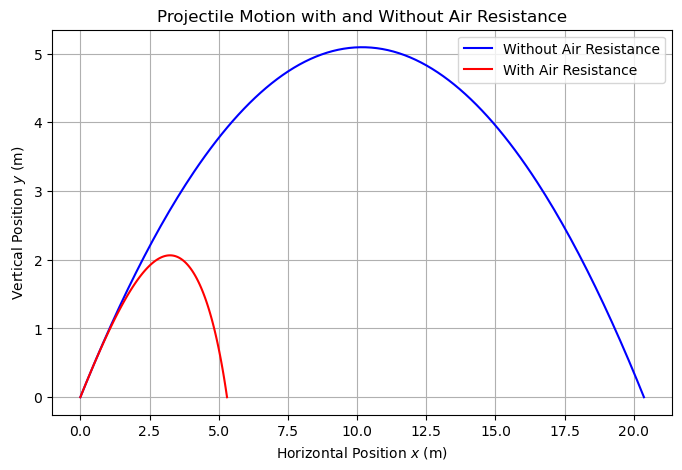

In [37]:
# b)
g = 9.82
rho = 1.2
m = 5.0e-3 # kg
r = 3e-2 # m
c = 0.55
A = np.pi * r**2

# Solve the system with air resistance
t_span = [0, 10]
x = 0
y = 0
vx = 10
vy = 10
z0 = [x, y, vx, vy]
sol_air = solve_ivp(f_air, t_span, z0, events=floor_hit, dense_output=True, max_step=0.01)
sol = solve_ivp(f, t_span, z0, events=floor_hit, dense_output=True, max_step=0.01)

# Display result and make a plot
display(sol)
display(sol_air)
t_air = sol_air.t
x_air = sol_air.y[0]
y_air = sol_air.y[1]

t = sol.t
x = sol.y[0]
y = sol.y[1]
# Create the plot
plt.figure(figsize=(8, 5))
plt.title('Projectile Motion with and Without Air Resistance')

# Plot the trajectory
plt.plot(x, y, 'b-', label='Without Air Resistance')
plt.plot(x_air, y_air, 'r-', label='With Air Resistance')

# Labels and legend
plt.xlabel('Horizontal Position $x$ (m)')
plt.ylabel('Vertical Position $y$ (m)')
plt.legend()
plt.grid()

# Show the plot
plt.show()

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.731e-04 ...  8.919e-01  8.980e-01]
        y: [[ 0.000e+00  1.731e-03 ...  4.982e+00  5.000e+00]
            [ 1.000e+00  1.001e+00 ...  4.873e-02  3.816e-16]
            [ 1.000e+01  9.996e+00 ...  3.057e+00  3.027e+00]
            [ 7.727e+00  7.721e+00 ... -7.975e+00 -8.064e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA633C0450>
 t_events: [array([ 2.517e-01]), array([ 8.980e-01])]
 y_events: [array([[ 2.000e+00,  2.117e+00,  6.504e+00,  1.759e+00]]), array([[ 5.000e+00,  3.816e-16,  3.027e+00, -8.064e+00]])]
     nfev: 554
     njev: 0
      nlu: 0

Time to reach the net: 0.25 seconds


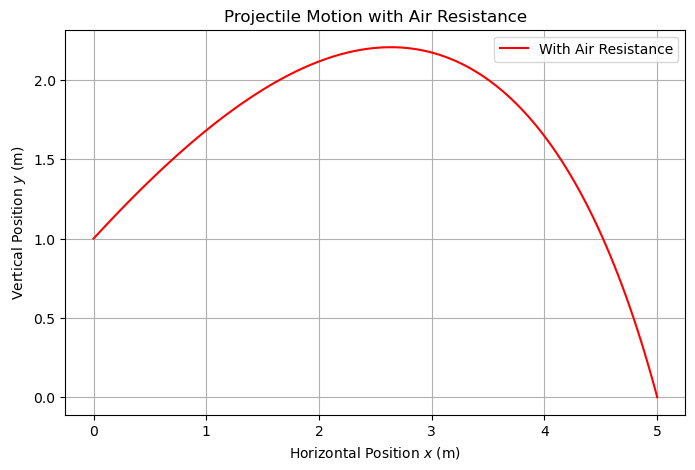

In [38]:
# c)
x = 0
y = 1
vx = 10
vy = 7.727
y0 = [x, y, vx, vy]

def at_net(t, z):
    x, y, vx, vy = z
    return x - 2 # Stop when x = 2
at_net.direction = 0
at_net.terminal = False

def clear_net(t, z):
    x, y, vx, vy = z
    return y # Stop when y = 0
clear_net.direction = -1
clear_net.terminal = True

# Solve the system with air resistance
t_span = [0, 10]
sol_air = solve_ivp(f_air, t_span, y0, events=[at_net, clear_net], dense_output=True, max_step=0.01)

display(sol_air)
print(f"Time to reach the net: {sol_air.t_events[0][0]:.2f} seconds")

# display the plot
t_air = sol_air.t
x_air = sol_air.y[0]
y_air = sol_air.y[1]
plt.figure(figsize=(8, 5))
plt.title('Projectile Motion with Air Resistance')
plt.plot(x_air, y_air, 'r-', label='With Air Resistance')
plt.xlabel('Horizontal Position $x$ (m)')
plt.ylabel('Vertical Position $y$ (m)')
plt.legend()
plt.grid()
plt.show()

#### Problem 3
The interaction between two non-bonding atoms or molecules can be described by the so-called Lennard-Jones potential

$$V\left(r\right)=4\epsilon\left(\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right)$$

where $r$ is the distance between the two molecules, and $\sigma$ and $\epsilon$ are two constants.


For xenon (Xe), $\sigma=4.00$ Å, and $\epsilon=1.77$ kJ/mol.
We will consider a model of the interaction between two xenon atoms of which one is fixed in position, $x=0$.

The relation between the force and the potential is
$$F(r)=-\frac{\partial V}{\partial r}$$




We can formulate the problem in a dimensionless form, which reduces the number of parameters and makes the problem numerically easier 
(since quantities become of the order one rather than very small (for position) and very large (for velocity)).
We take the equation of motion (Newton's second law)

>$m\frac{d^2r}{dt^2}=F(r)=-\frac{\partial V}{\partial r}$

Then we replace $r$ and $t$ with scalings $k_rR$ and $k_tT$ respectively.
If we then choose $k_r=\sigma$ and $k_t=\sqrt{m\sigma^2/(24\epsilon)}$ we arrive at the dimensionless formulation

>$\frac{d^2R}{dT^2}=\frac{2}{R^{13}}-\frac{1}{R^{7}}$

We can introduce a dimensionless potential energy, $U$ by integration of the dimensionless force which yields

>$U(R)=\frac{1}{6R^{12}}-\frac{1}{6R^6}$

The dimensionless potential energy and force are shown below.

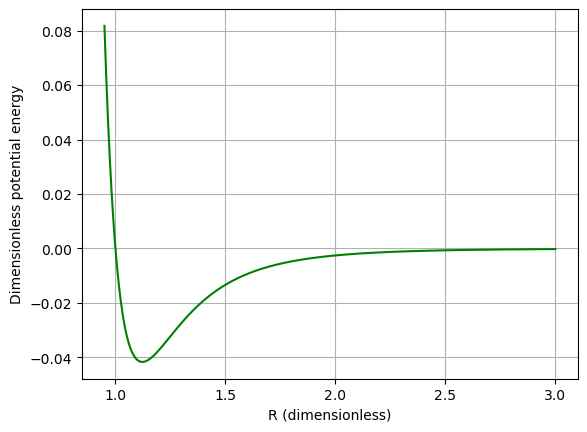

In [39]:
import numpy as np
import matplotlib.pyplot as plt
R = np.linspace(0.95,3.0,1000)
plt.figure()
plt.plot(R,1/6/(R**12)-1/6/(R**6),'g-')
plt.xlabel('R (dimensionless)')
plt.ylabel('Dimensionless potential energy')
plt.grid()
plt.show()

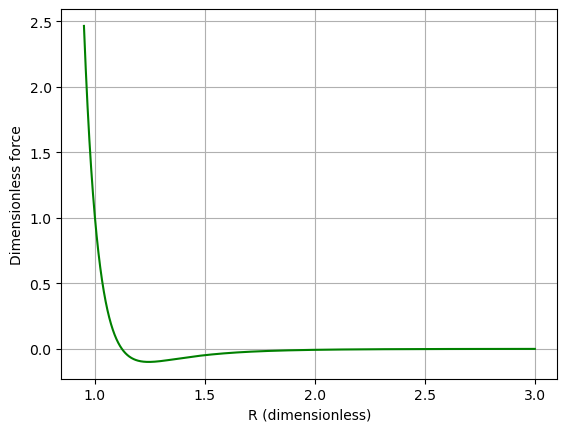

In [40]:
import numpy as np
import matplotlib.pyplot as plt
R = np.linspace(0.95,3.0,1000)
plt.figure()
plt.plot(R,2/(R**13)-1/(R**7),'g-')
plt.xlabel('R (dimensionless)')
plt.ylabel('Dimensionless force')
plt.grid()
plt.show()

##### Problems 

>a) A particle is fixed at the origin $r=0$, and an identical particle is placed at a distance of $r_0=\sqrt[6]{2}$. Simulate the motion of the particle and plot the position as a function of time (use for instance $t\in[0,1000]$). What is the type of motion the particle performs?

>b) Like above but with $r_0=2.0$. Plot the position and velocity as a function of time. Comment briefly.

>c) Like above but with $r_0\in[1.130,1.131,1.132,\ldots, 1.140]$. Plot the trajectories in $(x,v)$-phase space in the same figure. Comment briefly.

>d) Like above but with $r_0\in[1.13,1.14,1.15,\ldots, 1.20]$. Plot the trajectories in $(x,v)$-phase space in the same figure. Comment briefly.

>e) Like above but with $r_0\in[1.1,1.2,1.3,\ldots, 3.0]$. Plot the trajectories in $(x,v)$-phase space in the same figure. Comment briefly.


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  9.994e+02  1.000e+03]
        y: [[ 1.122e+00  1.122e+00 ...  1.123e+00  1.123e+00]
            [ 0.000e+00 -5.551e-21 ...  6.000e-05 -3.923e-04]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000001FA633758D0>
 t_events: None
 y_events: None
     nfev: 8450
     njev: 0
      nlu: 0

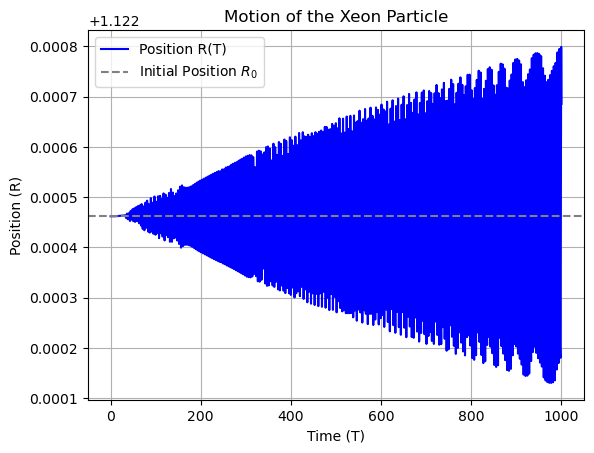

In [47]:
# a)
xeon, epsilon = 4, 1.77 # Å, kj/mol
R0 = 2**(1/6)  # Initial position (6th root of 2)
V0 = 0         # Initial velocity

def f(T, Y):
    R, V = Y
    return [V, (2 / R**13) - (1 / R**7)]

T_span = [0, 1000]  # Simulate for a reasonable time
Y0 = [R0, V0]  # Initial position and velocity

sol = solve_ivp(f, T_span, Y0, dense_output=True)
display(sol)

# Display result
t = sol.t
R = sol.y[0]
V = sol.y[1]
plt.figure()
plt.plot(t, R, 'b-', label="Position R(T)")
plt.axhline(R0, color='gray', linestyle='--', label="Initial Position $R_0$")
plt.xlabel("Time (T)")
plt.ylabel("Position (R)")
plt.title("Motion of the Xeon Particle")
plt.legend()
plt.grid()
plt.show()
